# WeatherPy
## Analysis
 - The closer a city is to the equator, the higher the temperature (F) of that city. This is noted in the "City Latitude vs. Temperature (3/1/2018)" graph, below, where the highest data points for temperature are above the "0" latitude (note that the equator is at latitude 0).
 - The Northern Hemisphere typically has higher wind speeds (mph). This is indicated in the "City Latitude vs. Wind Speed (3/1/2018)" graph where the data points for wind speed for cities in the Nothern Hemisphere (latitudes 0 to 90) are higher than for cities in the Southern Hemisphere (latitude -90 to 0).
 - The Southern Hemisphere typically has higher humidity %). This is indicated in the "City Latitude vs. Humidity (3/1/2018)" graph where there is greater number of data points with higher humidty for cities in the Souther Hemisphere (latitudes -90 to 0) than for cities in the Northern Hemisphere (latitude 0 to 90).
  

In [45]:
# Import Dependencies
import requests as req
import json
from citipy import citipy
from random import uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# API config and URL info
api_key = "84fe59f3ffa1bf7920c39149bf3dde70"
url = "http://api.openweathermap.org/data/2.5/weather?"

In [47]:
## Generate random lng/lat to put into citipy (citipy take in 2 coordinates (lng, lat))

# Functions for generating random latitude
def rand_lat():
  return uniform(-90, 90)

# Function for generating random longitude
def rand_lng():
  return uniform(-180,180)

In [48]:
# Create empty df to hold weather data for each city 
weather_data_df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Temperature", "Wind Speed"])

# Create initial variables for looping
counter = 0
unique_cities = []

# Initial print header for output log
print("Beginning Data Retrieval")
print("---------------------------")

# While loop to only capture cities without null weather data
while counter < 500:
    # Retrieve a city for each random lat/lng generated
    # Obtain the JSON response for each city
    city = citipy.nearest_city(rand_lat(), rand_lng())
    query_url =  url + "appid=" + api_key + "&q=" + city.city_name + "," + city.country_code + "&units=imperial"
    weather_response = req.get(query_url)
    weather_json = weather_response.json()
    
    # If statement for only cities with weather data (internal paramer "cod" = 200)
    if weather_json["cod"] == 200:
        # Check for duplicates
        if weather_json["name"] not in unique_cities:
            # Append weather data for the city to df
            weather_data_df = weather_data_df.append([{"City": weather_json["name"],
                                                       "Temperature": weather_json["main"]["temp"],
                                                       "Humidity": weather_json["main"]["humidity"],
                                                       "Cloudiness": weather_json["clouds"]["all"],
                                                       "Wind Speed": weather_json["wind"]["speed"],
                                                       "Lat": weather_json["coord"]["lat"],
                                                       "Country": weather_json["sys"]["country"],
                                                       "Lng": weather_json["coord"]["lon"],
                                                       "Date": weather_json["dt"]
                                                      }])
            
            # Add to city-weather data confirmed counter         
            counter += 1
            
            # Append the city to the unique cities list
            unique_cities.append(weather_json["name"])
        
            # Print log statements
            print("Processing Record #" + str(counter) + " | City ID: " + str(weather_json["id"]) + " | City Name: " + city.city_name)
            print(query_url)


Beginning Data Retrieval
---------------------------
Processing Record #1 | City ID: 2077963 | City Name: albany
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=albany,au&units=imperial
Processing Record #2 | City ID: 2163355 | City Name: hobart
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=hobart,au&units=imperial
Processing Record #3 | City ID: 3361934 | City Name: saldanha
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=saldanha,za&units=imperial
Processing Record #4 | City ID: 5380437 | City Name: pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=pacific grove,us&units=imperial
Processing Record #5 | City ID: 3833367 | City Name: ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ushuaia,ar&units=imperial
Processing Record #6 | City ID: 3652567 | City Name: san crist

Processing Record #47 | City ID: 2125906 | City Name: dukat
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=dukat,ru&units=imperial
Processing Record #48 | City ID: 2155415 | City Name: new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=new norfolk,au&units=imperial
Processing Record #49 | City ID: 3863379 | City Name: mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=mar del plata,ar&units=imperial
Processing Record #50 | City ID: 964420 | City Name: port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=port elizabeth,za&units=imperial
Processing Record #51 | City ID: 2122090 | City Name: pevek
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=pevek,ru&units=imperial
Processing Record #52 | City ID: 3418910 | City Name: upernavik
http://api.openweathermap.org/d

Processing Record #93 | City ID: 2124611 | City Name: kholodnyy
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kholodnyy,ru&units=imperial
Processing Record #94 | City ID: 2150163 | City Name: sawtell
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=sawtell,au&units=imperial
Processing Record #95 | City ID: 3995236 | City Name: mulege
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=mulege,mx&units=imperial
Processing Record #96 | City ID: 3397763 | City Name: jacareacanga
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=jacareacanga,br&units=imperial
Processing Record #97 | City ID: 6050194 | City Name: la sarre
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=la sarre,ca&units=imperial
Processing Record #98 | City ID: 2966778 | City Name: ballina
http://api.openweathermap.org/data/2.5/weath

Processing Record #139 | City ID: 5924351 | City Name: clyde river
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=clyde river,ca&units=imperial
Processing Record #140 | City ID: 1847947 | City Name: shingu
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=shingu,jp&units=imperial
Processing Record #141 | City ID: 524681 | City Name: mrakovo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=mrakovo,ru&units=imperial
Processing Record #142 | City ID: 3372707 | City Name: ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ribeira grande,pt&units=imperial
Processing Record #143 | City ID: 3985168 | City Name: san patricio
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=san patricio,mx&units=imperial
Processing Record #144 | City ID: 3141667 | City Name: roald
http://api.openweathermap

Processing Record #185 | City ID: 2075720 | City Name: broome
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=broome,au&units=imperial
Processing Record #186 | City ID: 247176 | City Name: sabha
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=sabha,jo&units=imperial
Processing Record #187 | City ID: 2132606 | City Name: samarai
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=samarai,pg&units=imperial
Processing Record #188 | City ID: 1528998 | City Name: yumen
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=yumen,cn&units=imperial
Processing Record #189 | City ID: 2194098 | City Name: ahipara
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ahipara,nz&units=imperial
Processing Record #190 | City ID: 2021031 | City Name: kyren
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1

Processing Record #231 | City ID: 556268 | City Name: ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ostrovnoy,ru&units=imperial
Processing Record #232 | City ID: 2084442 | City Name: vanimo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=vanimo,pg&units=imperial
Processing Record #233 | City ID: 361055 | City Name: ismailia
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ismailia,eg&units=imperial
Processing Record #234 | City ID: 1505526 | City Name: irbit
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=irbit,ru&units=imperial
Processing Record #235 | City ID: 3137469 | City Name: sorland
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=sorland,no&units=imperial
Processing Record #236 | City ID: 2108502 | City Name: honiara
http://api.openweathermap.org/data/2.5/weather?appid=8

Processing Record #277 | City ID: 5797693 | City Name: hoquiam
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=hoquiam,us&units=imperial
Processing Record #278 | City ID: 1264976 | City Name: leh
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=leh,in&units=imperial
Processing Record #279 | City ID: 1254390 | City Name: tiruchchendur
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=tiruchchendur,in&units=imperial
Processing Record #280 | City ID: 2092164 | City Name: lorengau
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=lorengau,pg&units=imperial
Processing Record #281 | City ID: 986134 | City Name: kuruman
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kuruman,za&units=imperial
Processing Record #282 | City ID: 2187834 | City Name: mamaku
http://api.openweathermap.org/data/2.5/weather?a

Processing Record #325 | City ID: 1271476 | City Name: sualkuchi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=sualkuchi,in&units=imperial
Processing Record #326 | City ID: 5994763 | City Name: labelle
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=labelle,ca&units=imperial
Processing Record #327 | City ID: 5563839 | City Name: fortuna
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=fortuna,us&units=imperial
Processing Record #328 | City ID: 2270385 | City Name: camacha
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=camacha,pt&units=imperial
Processing Record #329 | City ID: 3388847 | City Name: sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=sao felix do xingu,br&units=imperial
Processing Record #330 | City ID: 1529376 | City Name: korla
http://api.openweathermap.or

Processing Record #371 | City ID: 4033356 | City Name: tiarei
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=tiarei,pf&units=imperial
Processing Record #372 | City ID: 3899695 | City Name: ancud
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ancud,cl&units=imperial
Processing Record #373 | City ID: 509483 | City Name: pinega
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=pinega,ru&units=imperial
Processing Record #374 | City ID: 2193968 | City Name: amberley
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=amberley,nz&units=imperial
Processing Record #375 | City ID: 5059429 | City Name: key west
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=key west,us&units=imperial
Processing Record #376 | City ID: 217834 | City Name: bukama
http://api.openweathermap.org/data/2.5/weather?appid=84fe59

Processing Record #418 | City ID: 3578441 | City Name: saint-francois
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=saint-francois,gp&units=imperial
Processing Record #419 | City ID: 2120047 | City Name: ust-omchug
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ust-omchug,ru&units=imperial
Processing Record #420 | City ID: 2418437 | City Name: kouroussa
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kouroussa,gn&units=imperial
Processing Record #421 | City ID: 3358666 | City Name: aranos
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=aranos,na&units=imperial
Processing Record #422 | City ID: 3691582 | City Name: talara
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=talara,pe&units=imperial
Processing Record #423 | City ID: 1716788 | City Name: cortes
http://api.openweathermap.org/dat

Processing Record #464 | City ID: 1715348 | City Name: panacan
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=panacan,ph&units=imperial
Processing Record #465 | City ID: 2022129 | City Name: kichera
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kichera,ru&units=imperial
Processing Record #466 | City ID: 1785462 | City Name: zaoyang
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=zaoyang,cn&units=imperial
Processing Record #467 | City ID: 1835848 | City Name: seoul
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=seoul,kr&units=imperial
Processing Record #468 | City ID: 1808106 | City Name: hongjiang
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=hongjiang,cn&units=imperial
Processing Record #469 | City ID: 105299 | City Name: jizan
http://api.openweathermap.org/data/2.5/weather?appid=84

In [49]:
# Output to csv
weather_data_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [50]:
# Display the count for each column in the Data Frame
weather_data_df.count()

City           500
Cloudiness     500
Country        500
Date           500
Humidity       500
Lat            500
Lng            500
Temperature    500
Wind Speed     500
dtype: int64

In [51]:
# Display the Weather Data Frame
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind Speed
0,Albany,92,AU,1519942609,93,-35.02,117.88,59.32,4.21
0,Hobart,75,AU,1519941600,77,-42.88,147.33,59.00,5.82
0,Saldanha,0,ZA,1519938000,52,-33.01,17.94,69.80,6.93
0,Pacific Grove,90,US,1519942080,87,36.62,-121.92,56.34,19.46
0,Ushuaia,75,AR,1519938000,66,-54.81,-68.31,51.80,4.70


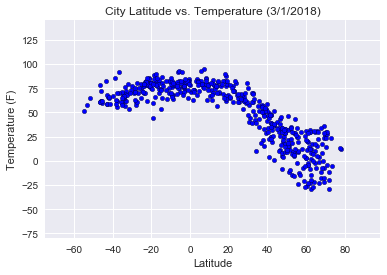

In [52]:
### Create the necessary graphs from the data frame
### AND SAVE each image as .png files

## Temperature (F) vs. Latitude
plt.title("City Latitude vs. Temperature (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Temperature"])-50, max(weather_data_df["Temperature"]) + 50)


plt.scatter(weather_data_df["Lat"], weather_data_df["Temperature"], s =20, edgecolor = "black", c = "blue")
sns.set()
plt.savefig("City-Latitude-vs-Temperature.png")
plt.show()

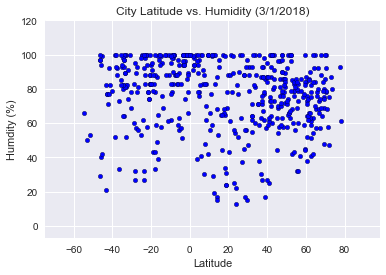

In [53]:
## Humidity (%) vs. Latitude
plt.title("City Latitude vs. Humidity (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humdity (%)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Humidity"])-20, max(weather_data_df["Humidity"]) + 20)


plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], s =20, edgecolor = "black", c = "blue")
sns.set()
plt.savefig("City-Latitude-vs-Humidity.png")
plt.show()

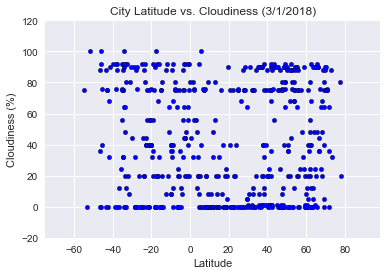

In [54]:
## Cloudiness (%) vs. Latitude
plt.title("City Latitude vs. Cloudiness (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Cloudiness"])-20, max(weather_data_df["Cloudiness"]) + 20)


plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], s =20, edgecolor = "black", c = "blue")
sns.set()
plt.savefig("City-Latitude-vs-Cloudiness.png")
plt.show()

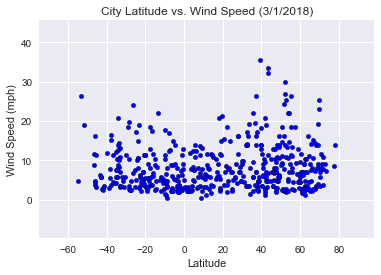

In [55]:
## Wind Speed (mph) vs. Latitude
plt.title("City Latitude vs. Wind Speed (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Wind Speed"])-10, max(weather_data_df["Wind Speed"]) + 10)


plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], s =20, edgecolor = "black", c = "blue")
sns.set()
plt.savefig("City-Latitude-vs-Wind-Speed.png")
plt.show()